# Proyecto Final

### Parte 1:

Análisis exploratorio de los datos
Para este proyecto debes descargar la base de datos abalone_train.csv que hace parte de los adjuntos del curso. 

Esta base de datos contiene información sobre un conjunto de abalones, que son un tipo de molusco. 

Las variables de la base de datos son:

* Sexo: masculino (M), femenino (F) o indefinido (I)
* longitud
* diametro
* altura
* peso_entero
* peso_sin_cascara
* peso_visceras
* peso_cascara
* edad


#### El objetivo final del proyecto es predecir la edad de un abalón, utilizando información de las variables disponibles en la base de datos. En este primer avance, el objetivo es realizar el análisis exploratorio de los datos. En particular, debes realizar lo siguiente:

i. ¿Cuántos datos tenemos para nuestro análisis?

ii. Encontrar estadísticas descriptivas de todas las variables de la base de datos. Entre ellas, deben estar: media, desviación
estándar, mínimo, máximo, percentiles 25, 50 y 75.

iii. Hacer un análisis exploratorio para ver qué variables pueden
ser las mejores al momento de predecir si una persona tiene diabetes. Para esto, debes generar:

i. Gráficos de dispersión de las variables 2.-8. contra la variable edad. ¿Cuáles variables parecieran ser buenas para explicar la edad de un abalón? 

Nota: Si se intenta hacer el gráfico de dispersión de la librería Seaborn para la variable sexo agregándole la línea de regresión como hicimos en clase, va a arrojar error por ser una variable categórica. 

Por eso debemos excluirla de este análisis si queremos agregar línea de regresión.

ii. Gráfico de calor para ver las correlaciones existentes entre variables. ¿Lo que se observa en el gráfico de calor concuerda con lo encontrado en los gráficos de dispersión? ¿Cuáles variables tienen correlaciones positivas o negativas más fuertes con respecto a la variable edad?

iii. Gráficos de cajas y bigotes para todas las variables categóricas o discretas. ¿Cuáles variables son categóricas? ¿Qué categorías tienen mayor edad en promedio?

Proyecto parte 2: métricas de desempeño de un modelo

Para esta segunda entrega debes descargar la base de datos abalone_test.csv. Esta base de datos contiene el conjunto de validación, sobre el que vamos a medir qué tan buen desempeño tiene un modelo particular.
Esta base de datos contiene exactamente las mismas variables que la base de datos de la primera entrega, además de dos nuevas columnas llamadas modelo_2 y modelo_3. Estas variables son la predicción de la edad de cada abalón utilizando dos modelos entrenados por otra persona.
 2
 
En este segundo avance, el objetivo es que midas el desempeño de cada modelo para predecir la variable edad y escoger cuál modelo es mejor entre los dos propuestos. En particular, es importante que hagas lo siguiente:
1. Grafica la variable edad contra la edad predicha en cada modelo (haz un gráfico separado para el modelo_2 y para el modelo_3). ¿Qué modelo pareciera ser mejor cuando se hace el análisis gráfico?
2. Calcular las métricas RMSE, MAE y MAPE para los dos modelos y construir una tabla que permita comparar los dos modelos.
3. ¿Qué modelo es mejor entre modelo_2 y modelo_3?
4. ¿Qué tan bueno es el mejor modelo? Es decir, si utilizamos el
mejor modelo, ¿qué tan grande es el error que vamos a tener, en promedio, a la hora de predecir la edad de un abalón?

Parte 3: Proyecto final

Ahora sí, llegó la hora de hacer analítica predictiva en Python. El objetivo de esta tercera entrega del proyecto es que construyas tu propio modelo de regresión para estimar la edad de un abalón.
Para este propósito, deberás usar las bases de datos abalone_test.csv y abalone_train.csv. El objetivo es que construyas distintos modelos para predecir la edad de un abalón y que escojas el mejor entre todos los modelos. Los puntos a entregar son:
1. De acuerdo con el análisis exploratorio de la primera entrega, ¿cuáles variables parecieran ser las que más información tienen para predecir la edad de un abalón?
2. Toma los datos del conjunto de entrenamiento abalone_train.csv. La idea es entrenar 3 distintos modelos de predicción con estos datos. Recuerda que las variaciones a tus modelos pueden ser:
a. Utiliza distintos modelos: regresión lineal univariada, regresión lineal multivariada, Random Forests con distintos parámetros
b. Utiliza distintas variables en cada modelo. 

Por ejemplo, en un modelo puedes utilizar longitud, diametro, altura y peso_entero. En otro modelo puedes utilizar todas las variables.
 3
 
c. Puedes construir nuevas variables.

Nota: Si intentas entrenar los modelos con la variable sexo, vas a obtener un error, puesto que esta variable es categórica y toma los valores no numéricos F, M e I. Para utilizar esta variable, ejecuta primero estos dos líneas de código:

df_train[[‘sexo_F’, ‘sexo_I’, ‘sexo_M’]] = pd.get_dummies(df_ train[‘sexo’])
df_test[[‘sexo_F’, ‘sexo_I’, ‘sexo_M’]] = pd.get_dummies(df_ test[‘sexo’])

Con esto, estás agregando al DataFrame tres columnas con valores 0 y 1: sexo_F, sexo_I, sexo_M. Para estimar los modelos, debes incluir estas tres variables en vez de sexo.

3. Toma los datos del conjunto de validación abalone_test.csv. Para cada uno de los modelos del punto 2., haz la gráfica que muestra la edad real vs la edad predicha por cada modelo. Según el análisis gráfico, ¿qué modelo pareciera ser el mejor?
4. Calcula las métricas RMSE, MAE y MAPE y agrégalas en una tabla que permita comparar el desempeño de los tres modelos. ¿Qué modelo es mejor en predecir la edad de un abalón? ¿Qué tan bueno es el mejor modelo?tiene diabetes? ¿Qué tan bueno es el mejor modelo?


In [132]:
# Primero importamos nuestras librerias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [133]:
df_train = pd.read_csv('abalone_train.csv')
df_test = pd.read_csv('abalone_test.csv')

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sexo              3342 non-null   object 
 1   longitud          3342 non-null   float64
 2   diametro          3342 non-null   float64
 3   altura            3342 non-null   float64
 4   peso_entero       3342 non-null   float64
 5   peso_sin_cascara  3342 non-null   float64
 6   peso_visceras     3342 non-null   float64
 7   peso_cascara      3342 non-null   float64
 8   edad              3342 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 235.1+ KB


In [135]:
df_train.describe()

,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,0.522362,0.406858,0.139461,0.823557,0.355899,0.179492,0.238495,10.040694
std,0.120648,0.099741,0.042764,0.491525,0.221827,0.109655,0.141137,3.335768
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.092500,0.127875,8.000000
50%,0.540000,0.425000,0.140000,0.795750,0.332000,0.169250,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.145000,0.497000,0.249875,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Value counts, para saver cuantos datos hay de cada elemento a ver la distribucion de la data.

In [136]:
# Esta distribucion dice que hay mas de 180 elementos de sexo masculino mas que los demas.
df_train.value_counts('sexo')

sexo
M    1233
F    1070
I    1039
dtype: int64

In [137]:
df_train.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
0,M,0.620,0.490,0.155,1.1000,0.5050,0.2475,0.3100,9
1,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,9
2,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9
3,I,0.340,0.255,0.075,0.1800,0.0745,0.0400,0.0525,6
4,F,0.670,0.505,0.205,1.3645,0.6075,0.3025,0.3530,9


In [138]:
df_train.groupby(['sexo']).mean()

,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
sexo,,,,,,,,
F,0.576098,0.452322,0.157701,1.033271,0.438700,0.227446,0.299690,11.272897
I,0.424986,0.324427,0.107377,0.424676,0.188345,0.090859,0.126053,7.881617
M,0.557786,0.436865,0.150669,0.977689,0.425236,0.212564,0.280139,10.790754


In [139]:
df_train.groupby(['sexo']).max()

,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
sexo,,,,,,,,
F,0.815,0.65,1.130,2.6570,1.488,0.5900,1.005,29
I,0.680,0.53,0.215,1.7860,0.715,0.4005,0.530,21
M,0.775,0.63,0.515,2.8255,1.351,0.7600,0.897,27


<AxesSubplot:>

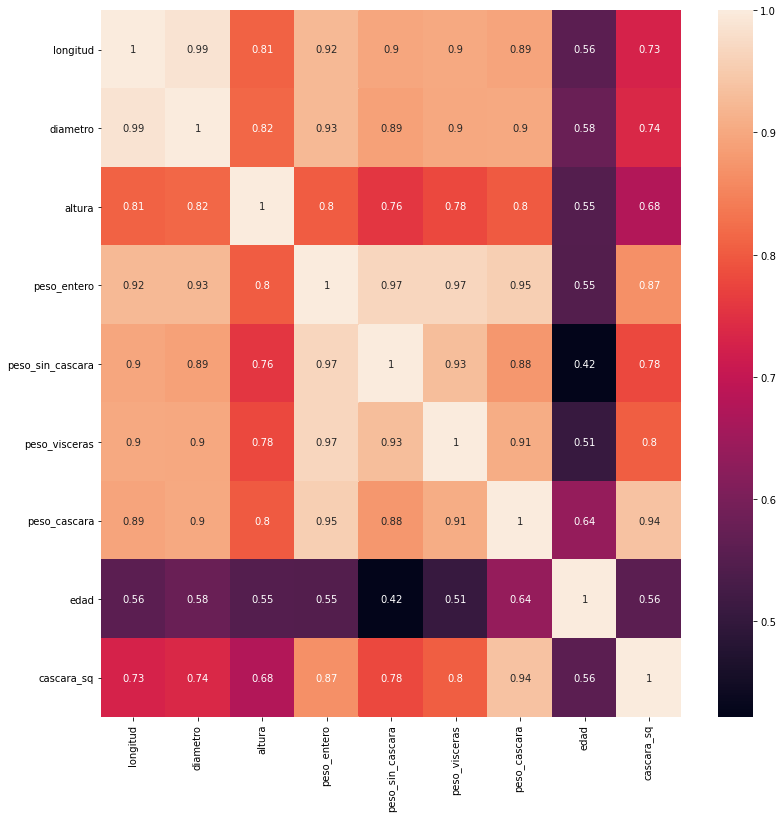

In [228]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot=True)

In [141]:
## Las variables peso de la cascara esta muy correlacionada posivamente con la edad del moslusco.
## Pesos viceras por igual.

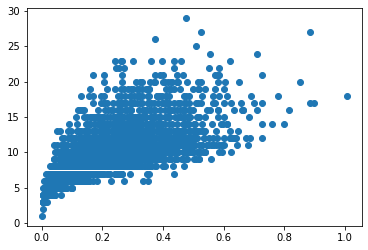

In [142]:
# Esta variable esta muy bien determinante, a medida que aumenta la edad, aumenta el peso de la cascara.
plt.scatter(df_train['peso_cascara'],df_train['edad'])

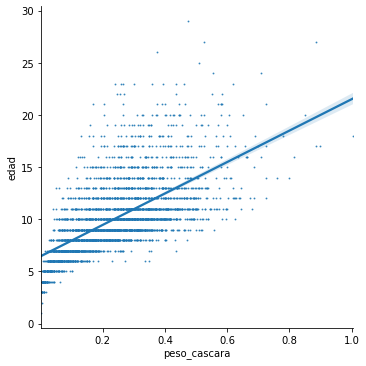

In [143]:
# Ahora con una linea de regresion.
sns.lmplot(x='peso_cascara', y='edad', data=df_train, truncate = True, scatter_kws={'s':0.8, 'alpha':0.8})

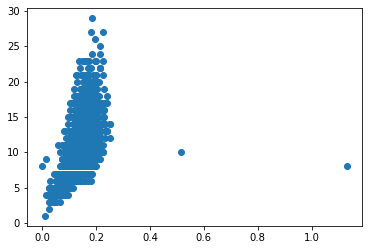

In [144]:
# No necesaremanete un Molusco por su edad crece de altura
plt.scatter(df_train['altura'],df_train['edad'])

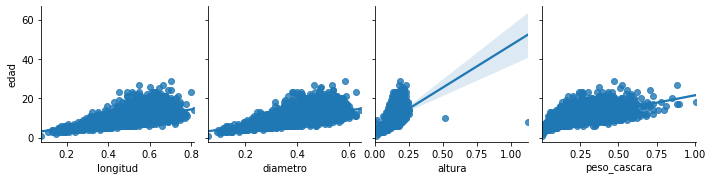

In [145]:
sns.pairplot(df_train,x_vars=['longitud','diametro','altura','peso_cascara'],y_vars=['edad'],kind='reg')

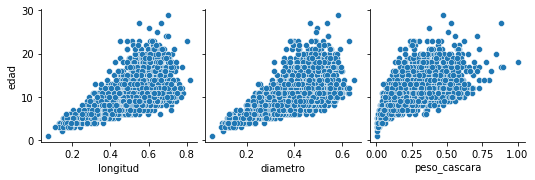

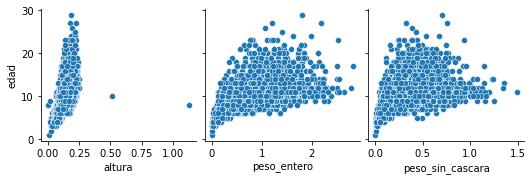

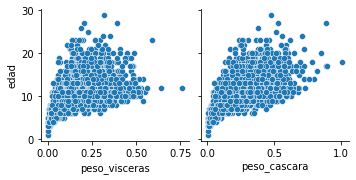

In [229]:
sns.pairplot(df_train, x_vars=['longitud', 'diametro', 'peso_cascara'], y_vars=['edad'])
sns.pairplot(df_train, x_vars=['altura', 'peso_entero', 'peso_sin_cascara'], y_vars=['edad'])
sns.pairplot(df_train, x_vars=['peso_visceras', 'peso_cascara'], y_vars=['edad'])

## Existe una correlacion positivas que a mayor altura es mayor edad. 
Levemente el peso de la cascara, la longitud. Pero la edad es muy determinante por estas variables.


<AxesSubplot:xlabel='sexo', ylabel='count'>

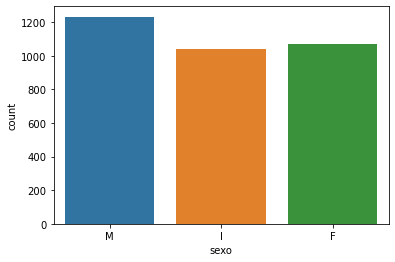

In [146]:
sns.countplot(x ='sexo',data=df_train)

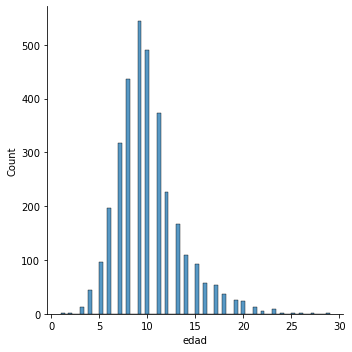

In [147]:
sns.displot(df_train['edad'])

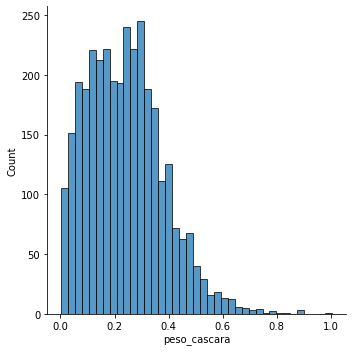

In [148]:
sns.displot(df_train['peso_cascara'])

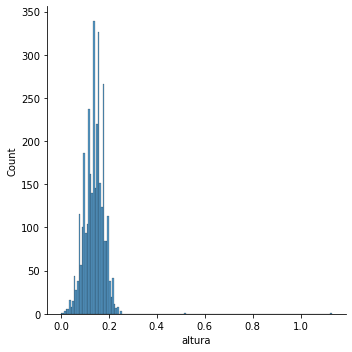

In [149]:
sns.displot(df_train['altura'])

## Boxplot 
Variable Categorica como el sexo con la edad

<AxesSubplot:xlabel='sexo', ylabel='edad'>

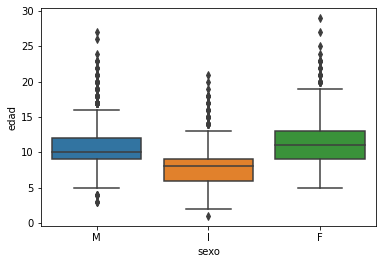

In [150]:
sns.boxplot(x ='sexo', 
            y ='edad', 
            data=df_train)


### Las del sexo femenino pueden ser un poco mas altas que los machos.

<AxesSubplot:xlabel='sexo', ylabel='peso_cascara'>

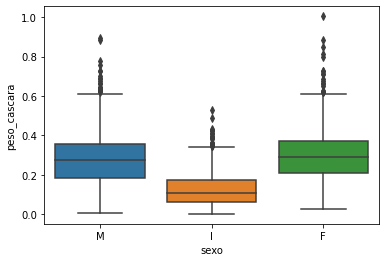

In [153]:
sns.boxplot(x ='sexo', 
            y ='peso_cascara', 
            data=df_train)


In [154]:
df_train.value_counts('sexo')

sexo
M    1233
F    1070
I    1039
dtype: int64

## Conclusiones del analisis exploratorio.

Todas las variables estan correlacionadas con la edad, siendo .. la mas 

# Analisis Predictivo 

In [155]:
#importamos la las funciones para los modelos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor


# Crear nuevas variables con el sexo del MOLUSCO

Como el codigo get_dummies estaba teniendo problemas busque la otra forma para hacer la ingenieria de variables.
Solo dos columnas para capturar la informacion sin que tenga una sobre informacion o prevenir el overfiting. 


train_dummies = pd.get_dummies(df_train.sexo, prefix='Sexo').iloc[:,1:]

Si es 0-0 es Femenino, Si es 1-0 es indefinido, Si es 0-1 es Masculino.

Luego concatenamos con la funcion pd.concat(), para unir este nuevas dos columnas con nuestro df_train lo mismo haremos con df_test.

El algoritmo sera asi df_train = pd.concat([df_train,train_dummies],axis=1)

y de test:

df_test = pd.concat([df_test,test_dummies],axis=1)

In [156]:
df_train.columns

Index(['sexo', 'longitud', 'diametro', 'altura', 'peso_entero',
       'peso_sin_cascara', 'peso_visceras', 'peso_cascara', 'edad'],
      dtype='object')

In [158]:
train_dummies = pd.get_dummies(df_train.sexo, prefix='Sexo').iloc[:,1:]

In [159]:
train_dummies 

,Sexo_I,Sexo_M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,0
...,...,...
3337,1,0
3338,1,0
3339,0,0
3340,0,1


In [160]:
df_train = pd.concat([df_train,train_dummies],axis=1)

In [161]:
df_train.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad,Sexo_I,Sexo_M
0,M,0.620,0.490,0.155,1.1000,0.5050,0.2475,0.3100,9,0,1
1,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,9,1,0
2,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9,0,1
3,I,0.340,0.255,0.075,0.1800,0.0745,0.0400,0.0525,6,1,0
4,F,0.670,0.505,0.205,1.3645,0.6075,0.3025,0.3530,9,0,0


In [162]:
test_dummies = pd.get_dummies(df_test.sexo, prefix='Sexo').iloc[:,1:]

In [163]:
test_dummies

,Sexo_I,Sexo_M
0,0,1
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
830,0,0
831,0,1
832,0,1
833,0,0


In [164]:
df_test = pd.concat([df_test,test_dummies],axis=1)

In [165]:
df_test.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad,modelo_2,modelo_3,Sexo_I,Sexo_M
0,M,0.430,0.330,0.095,0.340,0.1315,0.085,0.1120,14,16.98,15.13,0,1
1,F,0.455,0.365,0.110,0.385,0.1660,0.046,0.1345,13,20.73,16.38,0,0
2,I,0.495,0.380,0.145,0.515,0.1750,0.098,0.2120,13,18.43,13.51,1,0
3,F,0.480,0.380,0.145,0.590,0.2320,0.141,0.2300,12,17.72,14.71,0,0
4,I,0.470,0.400,0.160,0.510,0.1615,0.073,0.1980,14,17.66,16.27,1,0


# Modelo de regresión lineal univariada

### Segun nuestro analisis las variables con mayor correlacion es peso de la cascara o peso_cascara con un 0.64 de correlacion positiva. 

Vamos a empezar con ese analisis univariado primero de esa variable. 

In [166]:
# Importamos nuestras funciones de sklearn primero

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [204]:
regr = LinearRegression()

In [205]:
model = LinearRegression().fit(df_train[['peso_cascara']],df[['edad']])

In [210]:
model.predict(df_test[['peso_cascara']])
df_test[['predicted']]= pd.DataFrame(model.predict(df_test[['peso_cascara']]))

### Metricas para medir este modelo univariado con los RMSE, MAE, MAPE

In [211]:
# Abajo lo redondea a dos decimales y le pone el contenido o titulo. 
RMSE = mean_squared_error(df_test[['edad']],df_test[['predicted']],squared=False)
MAE = mean_absolute_error(df_test[['edad']],df_test[['predicted']])
MAPE = mean_absolute_percentage_error(df_test[['edad']],df_test[['predicted']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 2.27
MAE = 1.73
MAPE = 0.19


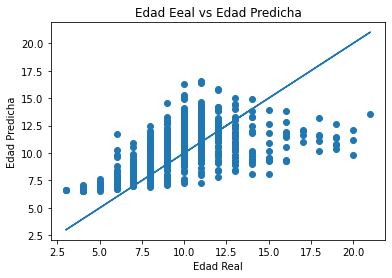

In [212]:
plt.scatter(df_test[['edad']], df_test[['predicted']])
plt.plot(df_test[['edad']], df_test[['edad']])
plt.title("Edad Eeal vs Edad Predicha")
plt.xlabel("Edad Real")
plt.ylabel("Edad Predicha")
plt.show()


## Regresion Lineal con Error Cuadratico

Lo haremos para ver si reduce nuestras metricas

In [175]:
df_train[['cascara_sq']] = df_train[['peso_cascara']]* df_train[['peso_cascara']]

In [176]:
linear_quad = LinearRegression().fit(df_train[['peso_cascara','cascara_sq']], df_train[['edad']])

In [177]:
df_test[['cascara_sq']] = df_test[['peso_cascara']]*df_test[['peso_cascara']]
df_test[['predicted_sq']] = pd.DataFrame(linear_quad.predict(df_test[['peso_cascara', 'cascara_sq']]))

In [178]:
RMSE = mean_squared_error(df_test[['edad']], df_test[['predicted_sq']], squared=False)
MAE = mean_absolute_error(df_test[['edad']], df_test[['predicted_sq']])
MAPE = mean_absolute_percentage_error(df_test[['edad']], df_test[['predicted_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 2.23
MAE = 1.72
MAPE = 0.19


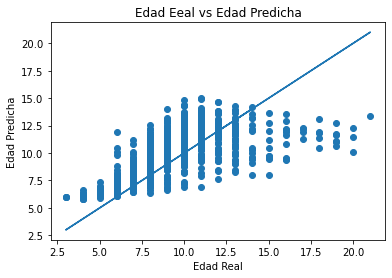

In [226]:
plt.scatter(df_test[['edad']], df_test[['predicted_sq']])
plt.plot(df_test[['edad']], df_test[['edad']])
plt.title("Edad Eeal vs Edad Predicha")
plt.xlabel("Edad Real")
plt.ylabel("Edad Predicha")
plt.show()


### Vemos que mejoro el modelo en error cuadratico, por decimas.

# Modelo de Regresion Multivariado 
Haremos un modelo multivariado, agregando el Sexo como variable, de la que hicimos con dummies variables.

In [200]:
columnas = ['longitud', 'diametro', 'altura', 'peso_entero',  'peso_sin_cascara'
      , 'peso_visceras', 'peso_cascara', 'Sexo_I','Sexo_M']

In [201]:
modelo_multi = LinearRegression().fit(df_train[columnas], df_train[['edad']])

In [202]:
df_test[['predicha_multi']] = pd.DataFrame(modelo_multi.predict(df_test[columnas]))

In [203]:
RMSE = mean_squared_error(df_test[['edad']],df_test[['predicha_multi']],squared=False)
MAE = mean_absolute_error(df_test[['edad']],df_test[['predicha_multi']])
MAPE = mean_absolute_percentage_error(df_test[['edad']],df_test[['predicha_multi']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 2.0
MAE = 1.5
MAPE = 0.16


#### Evalue varios modelos quitando varias varibales a la variable columnas, como el Sexo, peso viceras que presentaba baja correlacion. Pero con todas las variables el modelo baja las metricas.

# Random Forest 

In [219]:
random = RandomForestRegressor().fit(df_train[columnas], df_train[['edad']].values.ravel())

In [220]:
df_test[['predicha_random']] = pd.DataFrame(random.predict(df_test[columnas]))

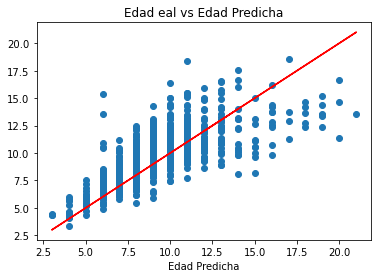

In [221]:
plt.scatter(df_test[['edad']], df_test[['predicha_random']])
plt.plot(df_test[['edad']], df_test[['edad']], color = 'red')
plt.title("Edad eal vs Edad Predicha")
plt.xlabel("Edad Real")
plt.xlabel("Edad Predicha")
plt.show()

In [222]:
RMSE = mean_squared_error(df_test[['edad']], df_test[['predicha_random']], squared=False)
MAE = mean_absolute_error(df_test[['edad']], df_test[['predicha_random']])
MAPE = mean_absolute_percentage_error(df_test[['edad']], df_test[['predicha_random']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 1.98
MAE = 1.45
MAPE = 0.15


In [ ]:
predictions2 = lr2.predict(X2_test)

In [225]:
feature_importance = pd.DataFrame({'variable':columnas, 'FI': random.feature_importances_})
feature_importance.sort_values('FI', ascending = False)

,variable,FI
6,peso_cascara,0.508018
4,peso_sin_cascara,0.162437
3,peso_entero,0.083212
5,peso_visceras,0.069087
2,altura,0.052172
1,diametro,0.050023
0,longitud,0.049933
7,Sexo_I,0.016443
8,Sexo_M,0.008676


### El modelo Random Forest es el Ganador, su porcentaje en los medidiores como RMSE, MAE y MAPE son ligermente menores los otros modelos realizados.

Al final pudimos ver la relevancia de cada variable con relacion a la edad, como dijimos la variable que mas importa en el modelo es el peso de cascara. 